In [1]:
from custom_clss_and_fncs import *

In [4]:
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
import matplotlib.gridspec as gridspec
import umap
from sklearn import preprocessing
def plot_classsifiers(X, y):
    

    #clf1 = LogisticRegression()
    #clf2 = DecisionTreeClassifier()
    clf3 = RandomForestClassifier()
    clf4 = SVC(gamma='auto')
    clf5 = GaussianNB()
    clf6 = MLPClassifier()

    gs = gridspec.GridSpec(3, 2)
    fig = plt.figure(figsize=(14,10))
    labels = ['Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
    for clf, lab, grd in zip([clf3, clf4, clf5, clf6],
                            labels,
                            [(0,0), (0,1), (1,0), (1,1)]):
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(lab)
    plt.show()

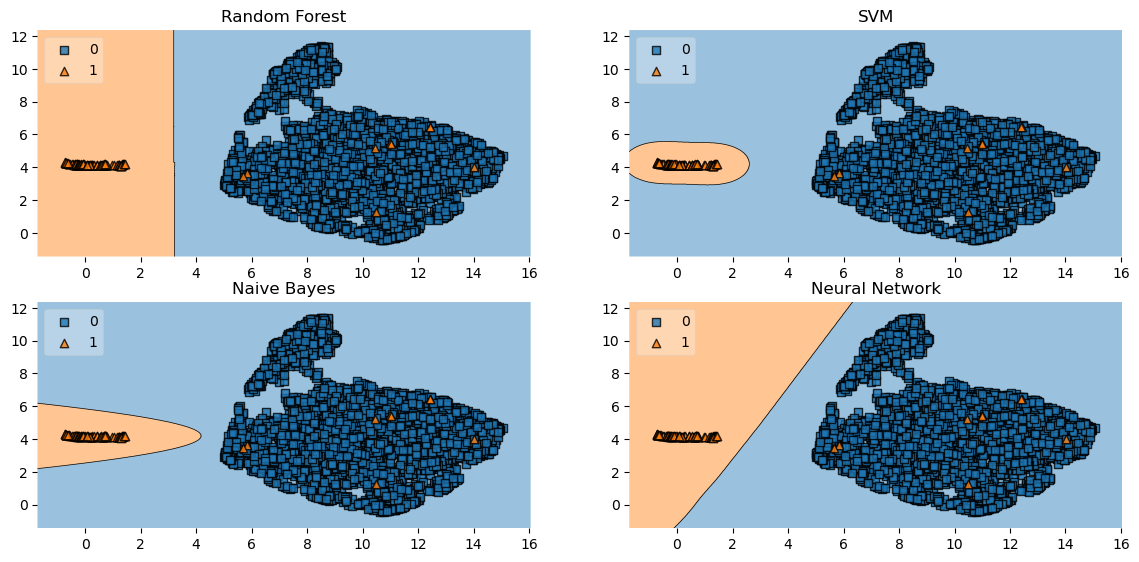

In [8]:
df        = pd.read_csv("./results/data/metabolite_data.csv")
col_names = df.select_dtypes(include=['float']).columns.__array__()
X         = df.select_dtypes(include=['float']).__array__()
le        = preprocessing.LabelEncoder()
y         = le.fit_transform(df.Condicion.__array__())
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
plot_classsifiers(embedding, y)


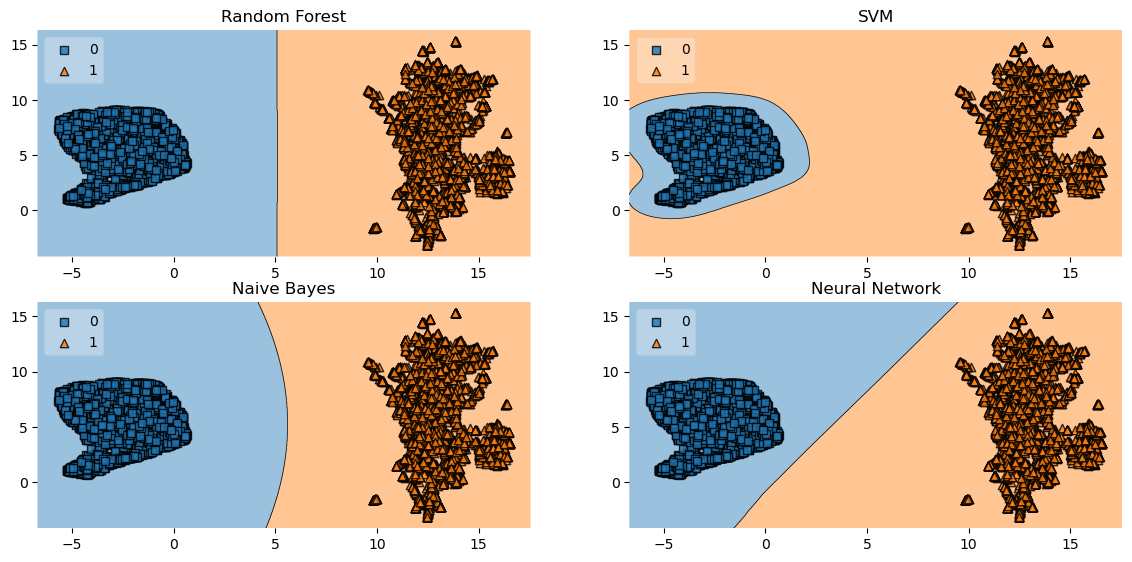

In [9]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(k_neighbors =100, n_jobs=-1 ).fit_resample(X, y)
embedding                = reducer.fit_transform(X_resampled)
plot_classsifiers(embedding, y_resampled)

In [10]:
aumented_data = pd.concat([ pd.DataFrame(y_resampled.astype(int), columns=['label']), pd.DataFrame(X_resampled, columns=col_names)], axis=1)
aumented_data.to_parquet('./results/data/oversampled_augmented_metabolite_data.parquet.gzip', compression='gzip')